In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [16]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# clean data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  #  remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  #Remove punctuation/numbers
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

# Remove empty reviews
df = df[df['cleaned_review'].str.strip() != '']

print(f"Empty reviews removed. New dataset size: {len(df)}")

#  Convert Sentiment to Numerical Values 
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

df['sentiment'] = df['sentiment'].astype(int)

print(f"Unique sentiment values: {df['sentiment'].unique()}")

# Split Data
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

vocab_size = 10000 
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)


max_length = 200  
X_train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

print(f"Vocabulary Size: {vocab_size}")
print(f"Max Sequence Length: {max_length}")
print(f"Sample Padded Sequence: {X_train_padded[0][:10]}") 
print(f"y_train sample: {y_train[:5]}") 


Empty reviews removed. New dataset size: 50000
Unique sentiment values: [1 0]
Vocabulary Size: 10000
Max Sequence Length: 200
Sample Padded Sequence: [ 178   47   10  757 2042  512  293    2  105 1860]
y_train sample: [0 0 1 0 0]


In [17]:
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),  # Reduced embedding dim
    Dropout(0.3),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),        # Fewer units
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
history = model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=128,  
    validation_split=0.2
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 234ms/step - accuracy: 0.5131 - loss: 0.6922 - val_accuracy: 0.6046 - val_loss: 0.6809
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 232ms/step - accuracy: 0.5883 - loss: 0.6732 - val_accuracy: 0.5312 - val_loss: 0.6861
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 234ms/step - accuracy: 0.6077 - loss: 0.6426 - val_accuracy: 0.8206 - val_loss: 0.4514
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.8512 - loss: 0.3724 - val_accuracy: 0.8593 - val_loss: 0.3328
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.9017 - loss: 0.2576 - val_accuracy: 0.8624 - val_loss: 0.3242
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.9306 - loss: 0.2046 - val_accuracy: 0.8685 - val_loss: 0.3386
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 234ms/step - accuracy: 0.9444 - loss: 0.1645 - val_accuracy: 0.8714 - val_loss: 0.3448
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 233ms/step - accuracy: 0.9573 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.8673 - loss: 0.4268

Test Accuracy: 0.8636
Test Loss: 0.4395
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step


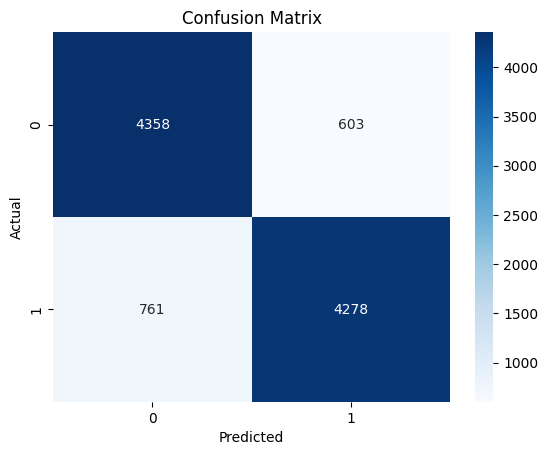


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4961
           1       0.88      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [19]:
# Test set evaluation
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Confusion Matrix
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))